In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [116]:
train = pd.read_csv('../downloads/train.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Working towards a basic predicted sale per item per store:

In [123]:
train.head(3)

id        date  store_nbr  item_nbr  unit_sales onpromotion
0   0  2013-01-01         25    103665         7.0         NaN
1   1  2013-01-01         25    105574         1.0         NaN
2   2  2013-01-01         25    105575         2.0         NaN

In [121]:
all_items = train.item_nbr.unique()
all_items

array([ 103665,  105574,  105575, ..., 2126944, 2123839, 2011451])

In [122]:
all_stores = train.store_nbr.unique()
all_stores

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21,
       42, 22, 52])

## Place the mean `unit_sales` for each item in a dictionary for each store 

In [ ]:

for index, row in train.iterrows():
    

In [44]:
item_numbers = [121964, 1421156, 1306197, 1909752, 
                1917879, 1353969, 1161555, 407499, 
                265559, 954796, 813760, 1695956,
                1028589, 1147731, 1076155, 315460,
                554145, 169104, 314880, 1726009]

In [87]:
first_item = df\
    .loc[df['item_nbr'] == item_numbers[9]]\
    .drop(['store_nbr', 'item_nbr', 'onpromotion', 'id'], axis=1)\


first_item = first_item.groupby('date').sum().reset_index()
first_item.unit_sales = first_item.unit_sales.astype(int)
first_item.head()

date  unit_sales
0  2013-01-02          37
1  2013-01-03          34
2  2013-01-04          45
3  2013-01-05          43
4  2013-01-06          43

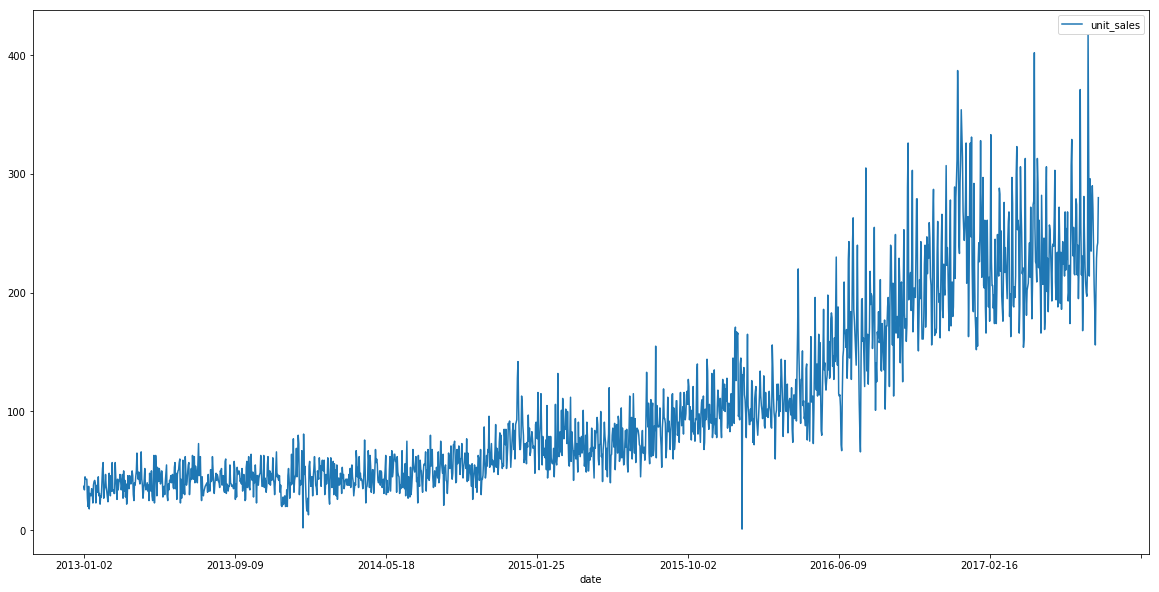

In [82]:
first_item.plot(x='date',y='unit_sales', kind='line', figsize=(20,10))

In [31]:
#events_per_day = pd.DataFrame({'date': rng, 'events': first_item['unit_sales']})  
#first_item.plot(y='unit_sales', kind='line', figsize=(20,10))

# Trying to fit the trend line

In [114]:
data = first_item
data['days_since'] = (pd.to_datetime(data.date) - pd.to_datetime(data.date.min()) )\
    .astype('timedelta64[D]')\
    .astype(int)

first_item['unit_sales'] = sm.add_constant(first_item['unit_sales'])
model = sm.OLS(np.asarray(first_item['days_since']),np.asarray(first_item['unit_sales']))
results = model.fit()
results.summary()




/usr/local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Tue, 14 Nov 2017   Prob (F-statistic):                nan
Time:                        18:18:28   Log-Likelihood:                -12788.
No. Observations:                1681   AIC:                         2.558e+04
Df Residuals:                    1680   BIC:                         2.558e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        842.5538     11.887     70.883      0.000     819.240     865.868
==============================================================================
Omnibus:                     1330.071   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.917
Skew:                           0.001   Prob(JB):                     1.22e-22
Kurtosis:                       1.800   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""